<a href="https://colab.research.google.com/github/chu-ise/413A-2022/blob/main/exam/midterm_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm 413A-2022

In [2]:
name = input("Poudel Birat")
sid = input("201847546 ")
print("Name: " + name + "\nStudent ID: " + sid)

Poudel Biratname
201847546 student id
Name: name
Student ID: student id


## Regression of advertising data


### Task 1: Import the data 

In [3]:
import gdown
id = "14xG8qNOuBuUbdR6NJ2lm_wN9T5_ZWjs8"

data_file = "Advertising.csv"
gdown.download(id=id, output=data_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=14xG8qNOuBuUbdR6NJ2lm_wN9T5_ZWjs8
To: /content/Advertising.csv
100%|██████████| 4.96k/4.96k [00:00<00:00, 6.54MB/s]


'Advertising.csv'

In [4]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv(data_file, index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Task 2: Plot and describe the data

+ Make a scatter chart showing the relationship between the dependent variable (Sales) and the independent variables (TV, radio, and newspaper). 

+ Compute the correlation matrix

+ Describe your findings. 


In [10]:
advert = pd.read_csv( 'Advertising.csv',index_col=0)
advert

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


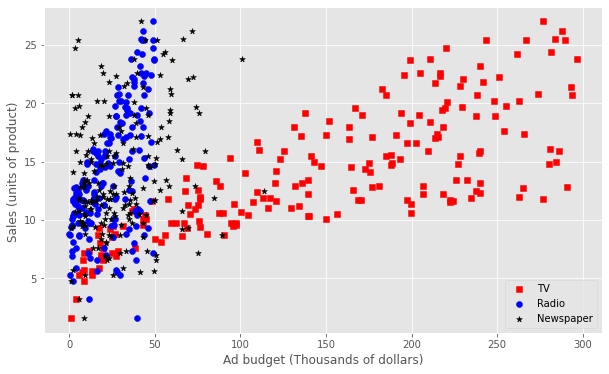

In [13]:
plt.scatter(x=advert['TV'],y=advert ['Sales'],c='r',marker='s',label='TV')
plt.scatter(x=advert['Radio'],y=advert ['Sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['Newspaper'],y=advert ['Sales'],c='k',marker='*',label='Newspaper')

plt.legend(loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel( 'Sales (units of product) ')
plt.show()

### Task 3: Simple  Linear Regression 
Use the `ols` function from the [statsmodels](http://www.statsmodels.org/stable/index.html) package to regress the Sales on some of the other variables. Your model should be of the form:
$$
\text{Sales} = \beta_0 + \beta_1 x, 
$$
where $x$ is one of the other variables (TV, radio, and newspaper). 

- Report the R-squared value for this model and give an interpretation for its meaning. 

- Give an interpretation of $\beta_1$ for this model. 

- Make a scatterplot of list price vs. sold price and overlay the prediction coming from your regression model. 

In [16]:
import scipy as sc 
from scipy.stats import norm 
import pandas as pd 
import numpy as np 
import statsmodels.formula.api as sm 
from sklearn import linear_model 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6) 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

In [17]:
advert = pd.read_csv('Advertising.csv',index_col=0) 
advert

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [18]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
ad_TV_ols = sm.ols(formula="Sales ~ TV", data=advert).fit() 
ad_TV_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        04:50:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 4: Multilinear Regression 
Develop a multilinear regression model for Sales using all three independent variables. Your model should be of the form:
$$
\text{Sales} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +  \beta_3 x_3, 
$$
where $x_i$ are predictive variables (TV, radio, and newspaper).


- Report the R-squared value for this model and give an interpretation for its meaning. 

- Give an interpretation of $\beta_1, \beta_2, \beta_3$ for this model. 

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


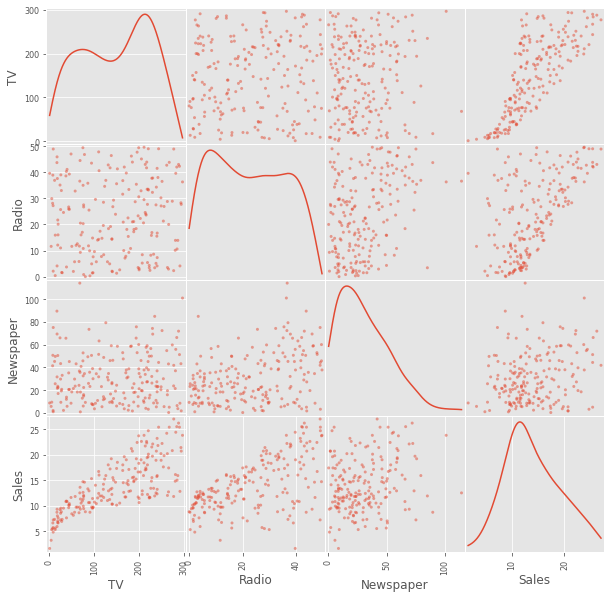

In [20]:
print(advert.corr()) 
pd.plotting.scatter_matrix(advert, figsize=(10, 10), diagonal='kde') 
plt.show()

In [21]:
ad_TR_ols = sm.ols(formula="Sales ~ TV + Radio", data=advert).fit() 
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           4.83e-98
Time:                        04:55:20   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

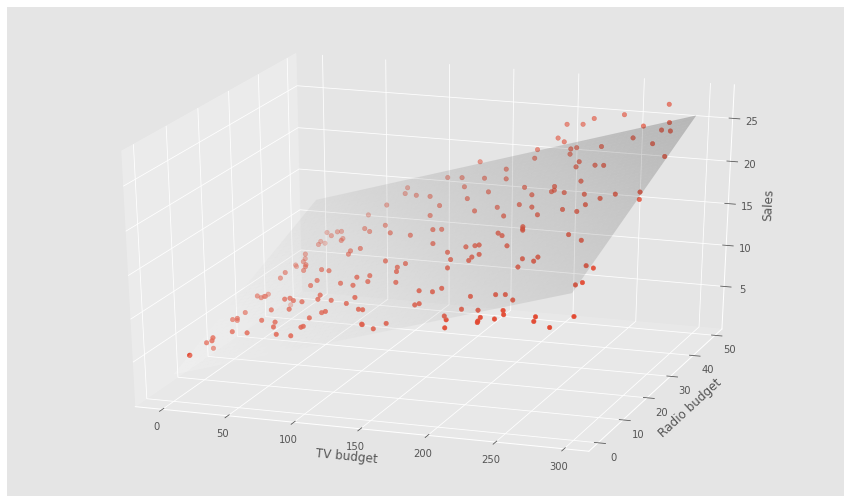

In [23]:
plt.rcParams['figure.figsize'] = (15, 9) 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales']) 
x = np.linspace(advert['TV'].min(), advert['TV'].max(), 100) 
y = np.linspace(advert['Radio'].min(), advert['Radio'].max(), 100) 
X,Y = np.meshgrid(x,y) 
par = dict(ad_TR_ols.params) 
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y 
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2) 
ax.view_init(25,-71) 
ax.set_xlabel('TV budget') 
ax.set_ylabel('Radio budget') 
ax.set_zlabel('Sales') 
plt.show()